In [19]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
#sets the default size of Matplotlib figures to 12 inches wide by 8 inches tall.
matplotlib.rcParams['figure.figsize']=(12,8)

# read in the data from csv file 
df = pd.read_csv(r'C:\Users\hmllb\Downloads\movies.csv')

# delete all missing data (null data) from a DataFrame. 
# The dropna() method removes any row that contains at least one null value by default.
df = df.dropna()

#change display settings (show all rows)
pd.set_option('display.max_rows', None)



In [20]:
# basic look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [21]:
# way to check if there is any missing data (null value)
# 1. 
for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing_data))
print('\n')
# 2.
for col in df.columns:
    print(df[col].isnull().value_counts(), " \n------------------ \n")
# 3.
df.isnull().sum() 

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


False    5421
Name: name, dtype: int64  
------------------ 

False    5421
Name: rating, dtype: int64  
------------------ 

False    5421
Name: genre, dtype: int64  
------------------ 

False    5421
Name: year, dtype: int64  
------------------ 

False    5421
Name: released, dtype: int64  
------------------ 

False    5421
Name: score, dtype: int64  
------------------ 

False    5421
Name: votes, dtype: int64  
------------------ 

False    5421
Name: director, dtype: int64  
------------------ 

False    5421
Name: writer, dtype: int64  
------------------ 

False    5421
Name: star, dtype: int64  
------------------ 

False    5421
Name: country, dtype: int64  
------------------ 

False    5421
Name: budget, dtype: int64  
------------------ 

False    5421
Name: gross, 

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [22]:
# other way to check if there is any missing data (NaN value)
any_missing = df.isna().any()
missing_rows_company = df.loc[df['company'].isna()]
missing_rows_count = df['company'].isna().sum()
missing_rows_count
print("---------------------------------------------")
missing_rows_company




---------------------------------------------


Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []

In [23]:
#data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [24]:
#change dtype of columns

df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')
df['votes']= df['votes'].astype('int64')
df['runtime']= df['runtime'].astype('int64')


In [25]:
#create correct year release (based on column "release")
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [26]:
#sorting data by value in "gross" column
df.sort_values(by=['gross'], inplace = False, ascending = False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [27]:
#check for duplicates
df.sort_values(['company'],ascending = False)

#drop any duplicates if exist 
df['company']= df['company'].drop_duplicates()

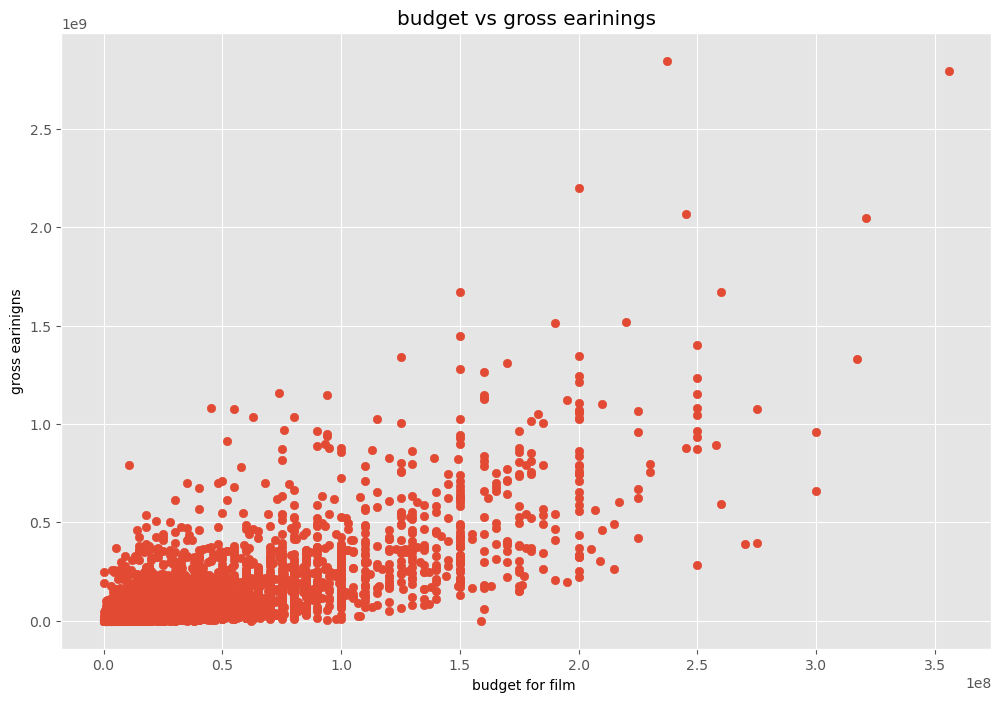

In [28]:
#budget high correlation
#company high correlation
#scatter plot with budget vs gross

plt.scatter(x=df['budget'], y= df['gross'])

plt.title('budget vs gross earinings')
plt.xlabel('budget for film ')
plt.ylabel('gross earinigns')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

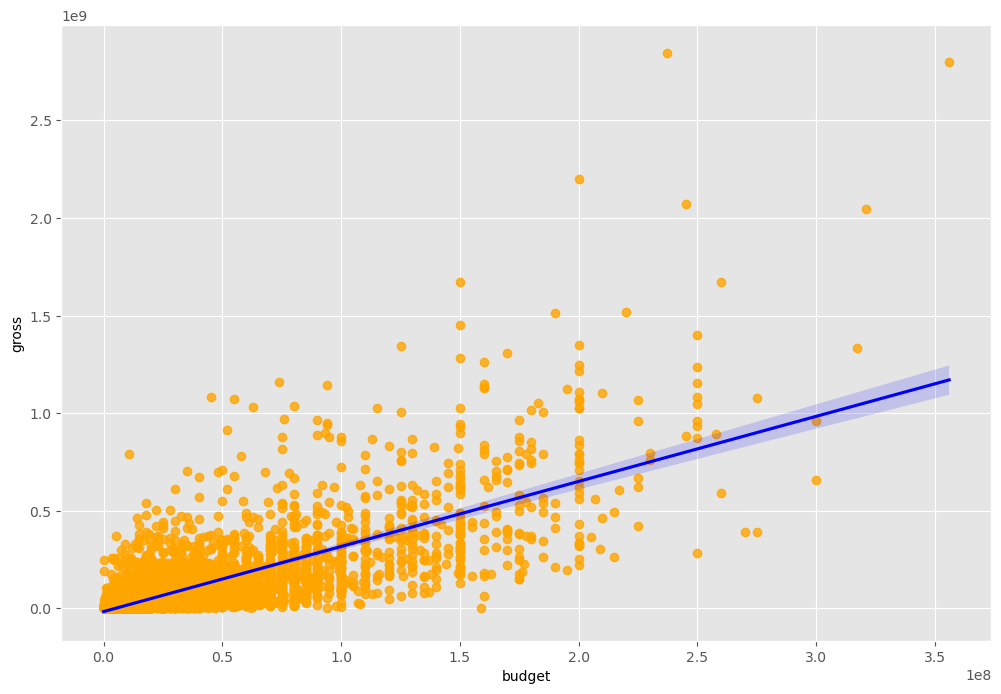

In [29]:
#plot => budget vs gross using seaborn

sns.regplot(
    x='budget',
    y='gross',
    data= df, 
    scatter_kws ={"color": "orange"}, 
    line_kws={"color": "blue"})

In [30]:
#looking at correlation
# numeric data
df.corr(numeric_only = True,method='pearson')

year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

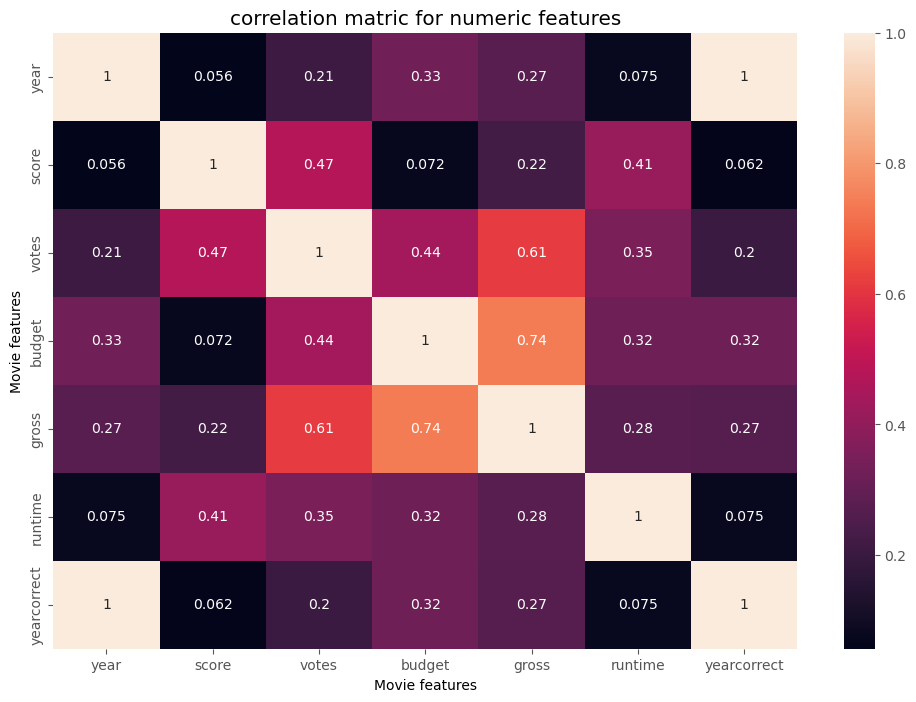

In [31]:


correlation_matrix = df.corr(numeric_only = True, method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('correlation matric for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [45]:
#looks at company
# string type
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.add_categories(['missing'])
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

name  rating  genre  year  released  score    votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000      1795    2832   
1  3929       6      1  1980      1127    5.8    65000      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000       757    1818   
3   204       4      4  1980      1127    7.7   221000       889    1413   
4   732       6      4  1980      1170    7.3   108000       719     351   

   star  country    budget      gross  company  runtime  yearcorrect  
0   699       46  19000000   46998772     1426      146         1980  
1   214       47   4500000   58853106      452      104         1980  
2  1157       47  18000000  538375067      945      124         1980  
3  1474       47   3500000   83453539     1108       88         1980  
4   271       47   6000000   39846344     1083       98         1980

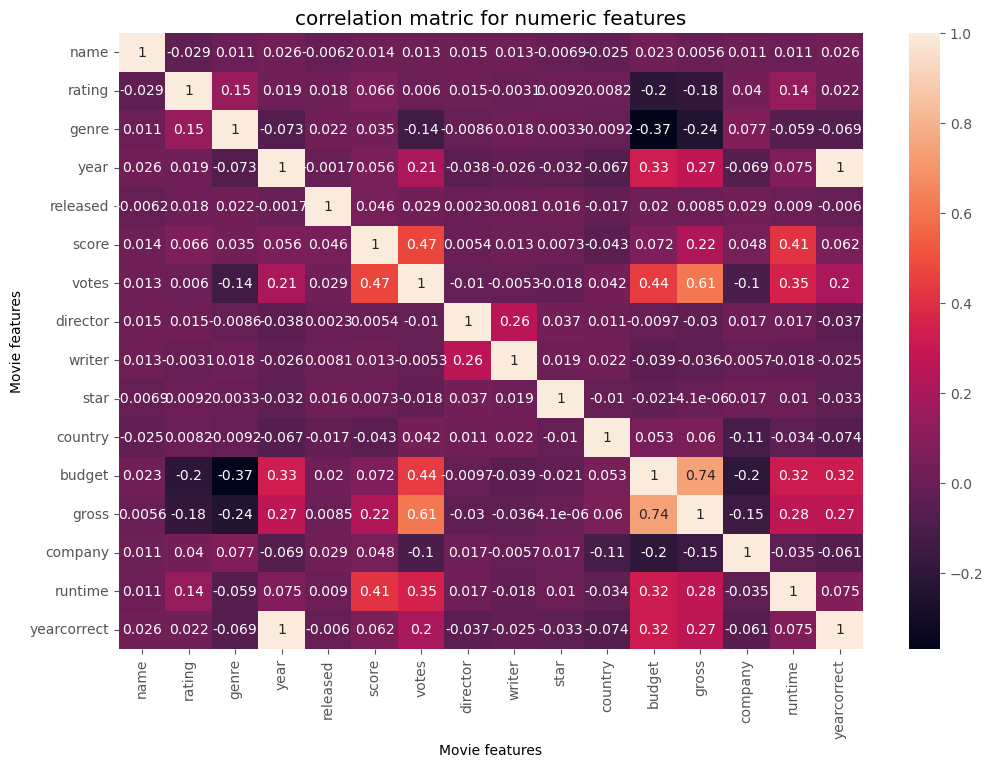

In [33]:
correlation_matrix = df_numerized.corr(numeric_only = True, method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('correlation matric for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

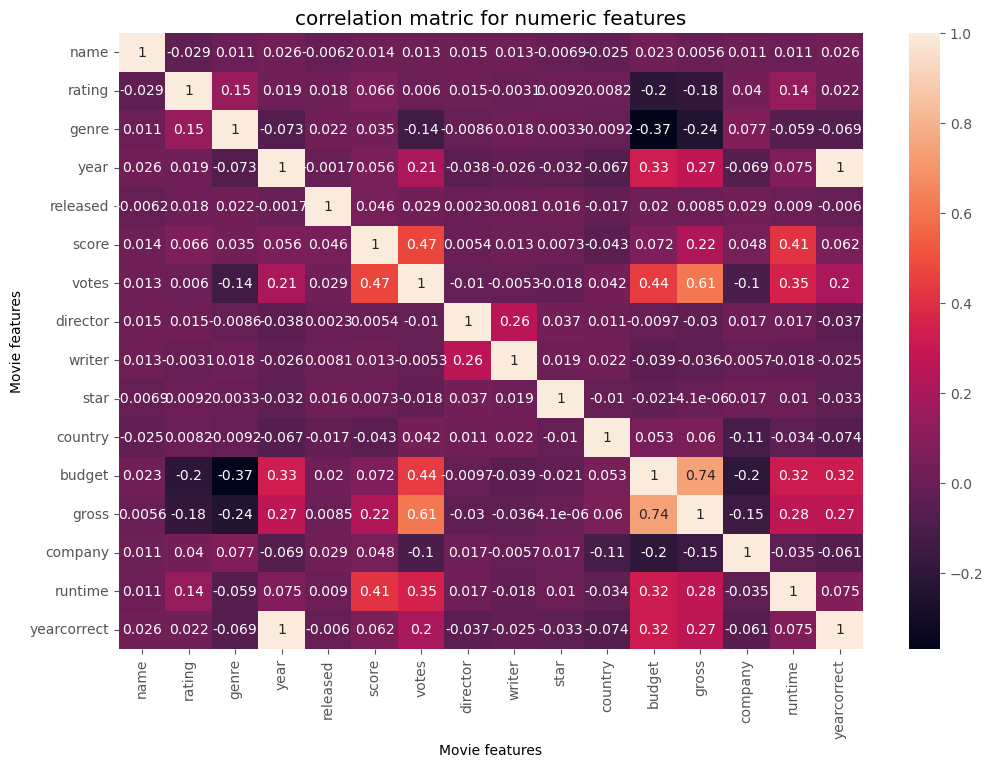

In [34]:
correlation_matrix = df_numerized.corr(numeric_only = True, method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('correlation matric for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [36]:


correlation_mat = df_numerized.corr()
corr_pair = correlation_mat.unstack()

corr_pair

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.011370
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [39]:
sorted_pairs= corr_pair.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
genre        gross         -0.244101
gross        genre         -0.244101
budget       rating        -0.203946
rating       budget        -0.203946
company      budget        -0.197893
budget       company       -0.197893
rating       gross         -0.181906
gross        rating        -0.181906
company      gross         -0.147686
gross        company       -0.147686
votes        genre         -0.135990
genre        votes         -0.135990
country      company       -0.114793
company      country       -0.114793
             votes         -0.099914
votes        company       -0.099914
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         company       -0.068506
company      year          -0.068506
year         country       -0.066748
c

In [44]:
#summary: Votes and budget have the highest correlation to gross (earnings)

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
yearcorrect  year           0.998726
year         yearcorrect    0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64